 2.1 DataFrame

A segunda estrutura de dados existente no pandas é o DataFrame. Estas são estruturas bidimensionais no formato de tabela, perfeitas para lidar com os dados tabulares que você estudou anteriormente. Então, assim como foi estudado, no DataFrame, cada linha representa uma observação; e cada coluna, uma variável dessa observação. Existem diversas formas de criar DataFrames. A mais simples é passando um dicionário de Python, utilizando o mapeamento chave-valor. A chave é o nome da variável, e o valor passado é uma coleção de valores. No exemplo a seguir, será criado e exibido um DataFrame representando a Tabela 1 que utilizamos como exemplo anteriormente. Verifique: 

1 In[16]: df = pd.DataFrame({'Aluno' : ['Marina','Felipe','Cleyton','Isabel'],
2     'Créditos cursados': [20,64,32,24],
3     'Rendimento acadêmico' : [8.55,7.88,8.17,9.04],
4    'Mês de nascimento' : ['Novembro','Setembro','Janeiro','Julho'],
5    'Curso': ['Computação','Estatística','Computação','Matemática']})
6
7 In[17]:df
8 Out[17]:

Você notou algo diferente entre a tabela exibida, chamando a variável df e a Tabela 1? No DataFrame, parece haver uma coluna a mais, com valores indo de 0 a 3. Na verdade, isso não é uma coluna, e sim o index do DataFrame, que é análogo ao index da Series. Podemos utilizar o index para acessar linhas específicas, entretanto devemos chamar o método iloc(). No exemplo a seguir, será acessada a linha 2, que retorna um objeto com as variáveis da linha:


1 In[18]:df.iloc[2] 
2 Out[18]: 
3 Aluno                      Cleyton
4 Créditos cursados               32
5 Rendimento acadêmico          8.17
6 Mês de nascimento          Janeiro
7 Curso                   Computação
8 Name: 2, dtype: object

Um detalhe importante sobre DataFrames é que as colunas são formadas por Series. Isso significa que você pode selecionar as colunas individualmente e aplicar sobre elas os mesmos métodos utilizados em Series! Para isso, seleciona-se uma coluna através do nome dela entre colchetes, de forma idêntica ao conceito chave-valor dos dicionários de Python. Confira nos exemplos a seguir como selecionar a coluna Rendimento acadêmico e calcular a sua média:


1 In[19]: df['Rendimento acadêmico']
2 Out[19]:
3 0    8.55
4 1    7.88
5 2    8.17
6 3    9.04
7 Name: Rendimento acadêmico, dtype: float64
        

Download do código sem numeração no link a seguir: Download código

O retorno dessa chamada é uma Series. Lembre que a coluna da esquerda é o index e a da direita os values.


In[20]: df['Rendimento acadêmico'].mean()
Out[20]: 8.41
        

Em média, o rendimento da turma foi de 8.41. Os outros métodos como std(), max(), min(), count() também podem ser usados em uma coluna, ou mesmo no DataFrame todo. 

Você pode ainda utilizar o método describe() da mesma maneira que na Series, para calcular diferentes medidas estatísticas em todas as variáveis quantitativas de uma só vez. Confira a seguir:


In[21]: df.describe()
Out[21]:
        

	Créditos cursados 	Rendimento acadêmico
count 	4.000.000 	4.000.000
mean 	35.000.000 	8.410.000
std 	19.966.639 	501.664
min 	20.000.000 	7.880.000
25% 	23.000.000 	8.097.500
50% 	28.000.000 	8.360.000
75% 	40.000.000 	8.672.500
max 	64.000.000 	9.040.000

Você notou que somente foram calculadas medidas das variáveis Rendimento acadêmico e Créditos cursados? Isso ocorre porque, nessa tabela, essas duas são as únicas variáveis quantitativas. Todas as outras são categóricas e não é possível fazer operações aritméticas sobre elas. Conseguiu entender até aqui? Podemos prosseguir? Então vamos lá!

Até o momento, você criou algumas estruturas de dados de forma manual. Esse conhecimento é bastante útil quando você precisar criar os seus próprios datasets, mas, na maior parte do tempo, estaremos analisando dados já existentes. Para isso, o pandas dispõe diversos métodos de leitura de arquivos de dados tabulares. Os métodos variam para cada formato de arquivo. Um formato aberto bastante utilizado é CSV, arquivos de texto com valores separados por vírgula. Outros formatos existentes são XLSX (formado de planilhas do Microsoft Excel), JSON, HTML, e muitos outros.

Para ler um arquivo CSV, utilize o método read_csv, passando como argumento o caminho do arquivo na máquina. Caso os dados estejam disponíveis na Web, você pode passar como argumento a URL dos dados.

No exemplo a seguir, será lido um dataset CSV disponível online. Os dados, em inglês, são referentes ao consumo de álcool por pessoa em diferentes países, coletados pela Organização Mundial da Saúde no ano de 2010. Confira o exemplo e, em seguida, verifique uma informação relevante no box Fique atento!


In[22]: df=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
        

Ícone Fique Atento!
Ícone “Fique Atento”.

Alternativamente, você pode baixar os dados para a sua máquina, selecionando a opção Salvar como. Nesse caso, o argumento passado para o método é o nome do arquivo se ele for salvo na mesma pasta que o Jupyter Notebook ou caminho completo para o arquivo, se ele for salvo em uma pasta diferente. Para isso, tente salvar o arquivo na mesma pasta e carregá-lo chamando df=pd.read_csv('drinks.csv').

Se o arquivo for lido corretamente, o DataFrame pode ser exibido chamando o nome da variável df, como você já foi feito anteriormente, mas, e se o DataFrame possuir muitas linhas? Verifique a seguir!

Caso o DataFrame tenha muitas linhas, como no exemplo a seguir, a tabela não será exibida inteiramente. Um método muito utilizado é o head(), que recebe como parâmetro um número inteiro e exibe apenas essa quantidade do topo das linhas do DataFrame. Por exemplo, se você quiser exibir as 6 primeiras linhas do DataFrame, você pode fazer assim:


In[23]: df.head(6)
Out[23]:
        

<img src='analise4.png'>

O DataFrame exibido corresponde às seis primeiras linhas do DataFrame completo. Esse método é útil para ter uma noção geral dos dados, quais são as colunas e que tipo de variáveis elas contém, sem precisar analisar todas as linhas. Você consegue entender este dataset? Ele possui 5 colunas: uma variável categórica, o nome do país e quatro variáveis quantitativas que são quantidade de latas de cerveja, doses de licor, taças de vinho e a quantidade total de litros de álcool consumido por pessoa em cada país em determinado ano. 

Para responder perguntas em grandes datasets, pode ser importante selecionar dados que atendam a condições específicas. Para isso, é utilizada a chamada indexação booleana. Você utiliza como chave a condição desejada entre os colchetes. Para ilustrar essa sintaxe, imagine que você queira saber os dados a respeito de consumo de álcool no Brasil. O exemplo a seguir mostra esse código:


In[24]: df[df['country'] == 'Brazil']
Out[24]:

<img src='analise5.png'>

Perceba que essa sintaxe corresponde a dizer: “me dê todos os dados, em que a coluna ‘country’ tem valor igual a ‘Brazil’”. Outras condições possíveis são comparações numéricas. Por exemplo, se você quiser saber os países cujo consumo total de álcool é maior ou igual a 12 litros por pessoa, faça assim:


In[25]: df[df['total_litres_of_pure_alcohol'] >= 12]
Out[25]:

<img src='analise6.png'>

Novamente, a sintaxe corresponde a: “me dê todos os dados onde o valor da coluna 'total_litres_of_pure_alcohol' é maior ou igual a 12.

Você percebeu que o resultado da seleção de um DataFrame também é um DataFrame? Muitos métodos aplicados sobre DataFrames possuem essa característica, como o já utilizado método head(). Isso significa que você pode aplicar, sobre o resultado desses métodos, todos aqueles que se aplicam em DataFrame, assim como ocorre com a Series. Por exemplo, se você quiser exibir apenas os 5 primeiros resultados da seleção dos países nos quais o consumo de álcool é igual a 0, você pode chamar o método head() após a seleção. Confira:


In[26]: df[df['total_litres_of_pure_alcohol'] == 0].head()
Out[26]:

<img src='analise7.png'>

Neste exemplo, o resultado de df[df['total_litres_of_pure_alcohol'] == 0] é um DataFrame contendo todos os países nos quais o consumo de álcool é zero. E sobre este DataFrame, é chamado o método head(), exibindo apenas os primeiros 5 elementos. Agora, que tal conferir uma dica bem interessante no box a seguir?
Ícone Fique Atento!
Ícone “Fique Atento”.

Quando estiver explorando conjuntos de dados, tenha em mente que nem sempre eles serão totalmente fidedignos à realidade. Coleta de dados está sempre suscetível a limitações, como erros de medição e dados faltantes. Por exemplo, neste dataset, existem vários países nos quais o consumo total de álcool é igual a zero, mas isso pode significar apenas que não haviam dados disponíveis naquele país. Ou talvez o álcool seja proibido e consumido clandestinamente. Note que, além de compreender o que os dados dizem, é preciso compreender o domínio dos dados, e como foi feita a coleta para evitar chegar a conclusões precipitadas.


Outra operação muito útil é ordenar os dados a partir de uma variável do maior para o menor, ou do menor para o maior. No pandas, isso é feito pelo método sort_values(). Este método recebe, como argumento, a variável pela qual os dados serão ordenados, através do argumento by, e se a ordem é ascendente ou descendente, atribuindo True ou False ao argumento ascending. O default de ascending é True. Ou seja, ordenar do menor para o maior. Confira como exibir os 5 países com maior consumo de vinho, do maior para o menor:


In[27]: df.sort_values(by='wine_servings', ascending = False).head()
Out[27]:

<img src='analise8.png'>

Observe que o resultado de df.sort_values(by ='wine_servings', ascending = False) é um DataFrame contendo todos os países, ordenados do maior para o menor consumo de álcool. Chamando o método head() neste DataFrame, apenas os 5 primeiros resultados são obtidos, que correspondem aos 5 países com maior consumo. Interessante, não é? Então, o que você achou desse resultado? Esse é só um exemplo de muitos que você pode pesquisar e usar para estudar e tirar suas dúvidas.

Agora que você aprendeu o básico sobre carregar e manipular dados, pode tentar aplicar esses conhecimentos em outros datasets. Existem milhares de datasets públicos disponíveis na Web, a maioria em inglês. Confira a seguir links de portais que contém vários datasets interessantes:
Ícone Saiba Mais
Ícone “Saiba Mais”.

http://www.dados.gov.br/

http://www.portaldatransparencia.gov.br/

https://www.kaggle.com/

https://www.reddit.com/r/datascience

https://github.com/BuzzFeedNews

https://github.com/fivethirtyeight/data

Infelizmente, encerramos por aqui esta aula de exploração de dados. Todavia, não é só isso que você pode explorar. O que você estudou nesta aula foram apenas algumas das operações básicas. O pandas dispõe de muitos outros métodos para selecionar, modificar, agrupar, combinar e limpar dados. Ao longo dos seus estudos, certamente você utilizará algumas dessas funções, que são muito importantes para o trabalho com dados. Mas não se assuste! Você não precisa necessariamente decorar todos os métodos possíveis. O mais importante é que você compreenda, conceitualmente, o que é necessário fazer com os dados para solucionar problemas, e essa habilidade virá gradualmente com estudo e prática. Ah! Não esqueça de conferir o glossário da aula. Até a próxima!

## Referências

    Data Never Sleeps 5.0, https://www.domo.com/learn/data-never-sleeps-5 - Último acesso em: Maio de 2020.
    Data Scientist: The Sexiest Job of the 21st Century, https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century - Último acesso em Abril de 2020.
    Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits?, https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/ - Último acesso em: Abril de 2020.
    Gomes; Pimenta; Schneider (23 de outubro de 2019). Data Mining in Information Science Research: Challenges And Opportunities. doi:10.5281/zenodo.3521038
    How Much Data Do We Create Every Day? The Mind-Blowing Stats Everyone Should Read, https://www.forbes.com/sites/forbestechcouncil/2019/11/15/data-is-the-new-oil-and-thats-a-good-thing/#78bb16b87304 - Último acesso em: Abril de 2020.
    Pandas,https://pandas.pydata.org/ - Último acesso em: Abril de 2020.
    Reis, E.A.; Reis, I.A. (2001). Análise Descritiva de Dados - Tabelas e Gráficos. Relatório Técnico RTE-04/2001, Depto Estatística-UFMG.



#1.2

Pense comigo, se são tantos dados produzidos diariamente, por que não aprender com eles? É pensando nisso, que a Ciência de Dados busca gerar conhecimento a partir de dados. Mas calma, primeiro, é preciso compreender as informações que os conjuntos de dados representam, pois observando-os diretamente nem sempre é uma tarefa fácil, e se torna ainda mais difícil conforme a quantidade de dados aumenta.

Assim, para lidar com esses dados, é preciso analisá-los e interpretá-los. Por isso, nesta aula, você será apresentado à Visualização de Dados, que é a tarefa de representar dados, e é uma das principais habilidades de análise, pois amplia a nossa capacidade de compreender e explorar grandes conjuntos de dados. Dessa forma, você conhecerá alguns dos princípios básicos para transformar dados em imagens que sejam verdadeiras, belas, funcionais e reveladoras. Além, é claro, de entender a importância de tudo isso.
Objetivos

    Entender a área de visualização de dados e a sua relevância no contexto da ciência de dados;
    Identificar as boas qualidades de uma visualização;
    Conhecer os princípios para mapear dados em elementos gráficos.



## Tópico 1 – Introdução à Visualização de Dados
OBJETIVOS

    Compreender a importância de visualização de dados;
    Entender a definição de visualização de dados;
    Analisar exemplos de uma visualização.

Após aquela breve introdução, me diga, você consegue observar uma tabela cheia de números e rapidamente ter boa noção sobre as informações que estão contidas ali? Para tabelas com poucas linhas, isso pode ser possível, não é mesmo? Porém, conforme você vai crescendo, o tamanho dos dados, esse tipo de análise, se torna inviável até para profissionais experientes. Por isso, não é preciso se apavorar. Segundo pesquisadores, isso é apenas uma característica do cérebro humano, viu? Ocorre que a maioria dos cérebros humanos simplesmente não são bons em processar longas e monótonas sequências de números ou textos. Contudo, eles são bem treinados para processar e reconhecer padrões visuais. Neste tópico, você aprenderá o que é visualização de dados e por que ela é uma ferramenta poderosa para explorar e compreender conjuntos de dados. Ah, você também irá aprender a identificar o que faz com que uma visualização seja boa.

Vamos lá?!

Para começar, vamos fazer um experimento. A seguir, há quatro tabelas – 1, 2, 3 e 4 – com dados fictícios sobre sites de compras. Cada tabela representa um site diferente e é composta por três colunas: Usuário, que diz respeito a cada usuário que acessa o site; x, que representa a quantidade de vezes que o usuário fez login no site; e y, que indica a quantidade total de horas que o usuário passou logado. 

<img src='tab1.png'>
<img src='tab2.png'>

Observando as tabelas, você consegue dizer algo sobre os sites 1, 2, 3 e 4? Por exemplo, existe alguma relação entre a quantidade de vezes que os usuários fizeram login e o tempo que eles gastam nos sites? Ou, essa relação é a mesma para todos os sites? Estas são algumas perguntas que poderiam surgir ao se trabalhar com estes dados. Portanto, note que apenas conferir os números brutos pode ser muito cansativo e os padrões podem não ser evidentes. Por isso, as tabelas são úteis para consultar valores específicos, mas não para extrair informações gerais sobre os dados.

Para facilitar o entendimento dos dados, você pode calcular algumas medidas estatísticas, como média e variância. As tabelas a seguir são referentes às tabelas anteriores, mas apresentam apenas com o cálculo da média e do desvio padrão – que indica o quanto os dados de um conjunto de dados são semelhantes – de cada variável em cada site. Confira: 

<img src='tab3.png'>

Você percebeu algo estranho nesses dados? Em cada site, a média e o desvio padrão da quantidade de visitas são idênticas, assim como o tempo gasto em cada um deles. Nessa perspectiva, podemos concluir que o comportamento dos usuários foi o mesmo em cada site? Talvez você concorde que essa pergunta é mais facilmente respondida quando os dados estão disponibilizados em um gráfico, como pode ser conferido na próxima página. Vamos lá? 

Dados são geralmente representados em gráficos com um sistema de coordenadas que indica a posição no gráfico de cada determinado valor nos dados. Deu para entender? Vamos analisar o exemplo a seguir! Nele, existem duas variáveis, sendo cada uma delas representada em um eixo de um gráfico. Os usuários são representados por pontos organizados no espaço. Cada vez que o ponto estiver localizado mais para a direita (eixo horizontal x), significa que mais vezes o usuário logou no site; e quanto mais acima (eixo vertical, y), mais tempo o usuário passou logado. Portanto, esse tipo de visualização é chamado de gráfico de dispersão, ou scatterplot, tudo bem? Observe, na figura a seguir, a visualização de dados dos quatro sites apresentados em tabelas anteriormente: 

<img src='graf1.png'>

Confira que, apesar de terem a mesma média e o mesmo desvio padrão, o comportamento dos usuários é completamente diferente em cada site. Esses diferentes padrões são percebidos mais rapidamente através de uma representação visual. Você já teve contato com esse tipo de gráfico antes? Esse conjunto de dados, famoso na estatística, chama-se Quarteto de Anscombe, e ilustra a necessidade de sempre organizar os dados para melhor entendê-los. Agora você percebe como isso é útil? Após entender esse experimento, vamos aprender um pouco mais sobre a Visualização de Dados! 

Formalmente, nós podemos definir Visualização de Dados como a área do conhecimento dedicada à geração de imagens que auxiliam na compreensão de dados. Assim, o objetivo da Visualização é ampliar a capacidade humana de entender dados e não substituir as pessoas com processos automatizados, como muitas pessoas acreditam. Ela é especialmente útil quando não se sabe, de antemão, que tipo de pergunta se deseja responder sobre os dados. Boas visualizações dão uma noção geral e imediata sobre os dados, tornando explícitos padrões, tendências, exceções e comparação entre valores. Além disso, são ótimas ferramentas para comunicar informações sobre dados para o público, pois são mais facilmente interpretadas, entendeu? Você, provavelmente, já deve ter tido contato com vários tipos de visualizações. Alguns professores, por exemplo, usam gráficos em suas aulas para mostrar aos alunos o crescimento da população em determinada área; o desempenho da economia de um país; ou mesmo, o aumento de mortes que ocorreram em uma pandemia durante determinado tempo.

Você consegue lembrar de mais algum exemplo? Se sim, você, certamente, vai concordar que esses gráficos ajudaram a compreender melhor o assunto e a interpretar melhor os dados, não foi? Então, é possível dizer que isso ocorre porque, como já foi comentado, algumas pesquisas afirmam que o sistema visual humano é extremamente rápido e eficiente para identificar padrões, ou seja, o sistema visual percebe padrões de forma quase imediata e sem precisar de muito raciocínio.

Quer saber mais como isso funciona? Vamos fazer mais um teste a seguir!

A seguir, há uma sequência de números consideravelmente grande e, nela, o número 7 aparece algumas vezes. Só em conferir essa sequência, você consegue contar rapidamente quantas vezes o número 7 aparece? Verifique.

09181973892184998590887696980913895281798490812905891389859896842985283483912785987496382529524098502395809

Bastante difícil, não é mesmo? No entanto, se o número 7 estiver destacado com cor diferente na sequência? Será que muda alguma coisa? Confira.

09181973892184998590887696980913895281798490812905891389859896842985283483912785987496382529524098502395809

E aí? Com certeza, desse modo, esse desafio torna bem mais fácil a identificação do número 7, concorda? Perceba o quanto é importante organizar os dados da melhor forma para que eles possam ser interpretados também de maneira adequada. A seguir, continue acompanhando explicações e exemplos que indicam a melhor forma de se criar visualizações. Vamos lá?

Visualização de dados é uma área interdisciplinar, ou seja, pode-se dizer que é tanto arte quanto ciência, pois é preciso ter conhecimento tanto sobre dados, estatística e computação, como sobre design e estética, para criar visualizações que sejam tanto informativas como atrativas. Assim, boas visualizações devem ter as seguintes qualidades:

    Verdadeira: representar dados objetivamente e não induzir a conclusões falsas, pois uma visualização que não é verdadeira possui informações incorretas;
    Funcional: deve ser clara e de fácil compreensão. Uma visualização que não é funcional pode ser confusa ou possuir informação em excesso;
    Bela: ser esteticamente agradável. Uma visualização que não é bela pode ser clara e informativa, mas não atrai o observador. Pode não parecer uma qualidade importante, mas as visualizações que não são belas passam menos credibilidade e não focam a atenção, prejudicando o seu objetivo final.
    Reveladora: revelar informações sobre os dados. Uma visualização que não é reveladora, apenas replica os dados de uma tabela e não leva a descoberta alguma de conhecimento.

Até aqui você está conseguindo compreender? Pois bem, note que essas características estão fortemente inter-relacionadas. Por exemplo, uma imagem que não é funcional provavelmente não será bela, e vice-versa. A partir da próxima página, analise alguns exemplos que mostram como uma visualização deve ser verdadeira, funcional, bela e reveladora.

Para começar, observe a tabela a seguir com dados fictícios sobre a quantidade de bolsas de sangue coletadas em uma unidade de doação de sangue:

<img src='tab4.png'>

Observe que a tabela possui duas variáveis: uma categórica e uma quantitativa. Embora, nesta tabela, você possa observar todos os dados de uma vez, pode-se dizer que ela não é reveladora, pois não evidencia de forma rápida a relação entre as quantidades de bolsas de sangue. Por isso, uma forma bastante utilizada de visualizar quantidades de diferentes classes é através de gráficos de barras, nos quais a altura de cada barra representa a quantidade de cada classe. Confira, a seguir, algumas formas de construir gráficos de barras para representar a Tabela 5 e analise cada um de acordo com as qualidades apresentadas anteriormente.

Figura 2 – Quantidade de bolsas de sangue – Visualização 1

<img src='graf2.png'>

Perceba que, na Visualização 1, as proporções entre as quantidades de bolsas de sangue estão alteradas e não há informações sobre as quantidades reais. Pela imagem, parece que há zero bolsas AB. Pode-se dizer que não é uma visualização verdadeira. A partir disso, saiba que é preciso estar atento para identificar visualizações que não são verdadeiras, pois elas são muito persuasivas e podem ser armas poderosas para manipular o público. No caso dessa imagem, o problema foi que o eixo vertical, que corresponde à quantidade das bolsas de sangue, não começa no valor zero. Note que a primeira linha guia que aparece seria a correspondente ao valor 2. Logo, a quantidade de bolsas AB não irá aparecer, pois equivale a 1.

Figura 3 – Quantidade de bolsas de sangue – Visualização 2
<img src='graf3.png'>

A Visualização 2 é similar à anterior, possuindo as mesmas informações, mas possui problemas estéticos devido ao uso desnecessário de cores berrantes. Embora seja informativo e relativamente claro, não é atrativo para o leitor. Pode-se dizer que não é belo.

Vamos avaliar mais alguns gráficos?


Figura 4 – Quantidade de bolsas de sangue – Visualização 3
<img src='graf4.png'>

A Visualização 3 também contém as mesmas informações das anteriores, mas o uso excessivo de linhas guias e de representação em 3D torna o gráfico poluído, dificultando o entendimento. Pode-se dizer que não é uma visualização funcional.
Figura 5 – Quantidade de bolsas de sangue – Visualização 4
<img src='graf5.png'>

Agora, analise o gráfico de barras da figura 5. Ele é uma visualização mais adequada da Tabela 5. Ele é claro, objetivo e permite compreender de forma intuitiva a diferença entre as quantidades de bolsas de sangue, que é o seu propósito.

Interessante, não é mesmo? Você percebe o quanto a organização desses dados implica na forma como eles serão interpretados? Pois bem! Você ainda tem muito o que aprender sobre isso. A seguir, acompanhe as considerações gerais sobre o que foi apresentado até aqui.

É importante ter em mente que estas qualidades são guias gerais pela qual devemos nos orientar durante a criação de uma visualização. Não há regras rígidas para se obter visualizações com todas as boas qualidades, e algumas vezes é preciso sacrificar uma qualidade para favorecer outra, a depender do objetivo principal. Note ainda que as qualidades em si podem ser bastante subjetivas, e variar de acordo com o público para o qual a visualização é direcionada. Uma visualização que é funcional para cientistas pode não ser para o público leigo. A busca desse equilíbrio é o que torna Visualização de Dados parecida com uma forma de arte. Com estudo e prática, você irá desenvolver naturalmente a intuição para criar visualizações verdadeiras, funcionais, belas e esclarecedoras para diferentes contextos e públicos.

No próximo tópico você irá conhecer alguns dos princípios básicos de como mapear dados para imagens, buscando manter as boas qualidades de uma visualização. Ah, você também irá conhecer alguns tipos de gráficos mais utilizados e a quais tipos de dados eles melhor se adequam. Preparado(a)? Vamos lá!

## Tópico 2 – Mapeando Dados em Imagens
OBJETIVOS

    Reconhecer os principais elementos de vocabulário visual;
    Identificar sistemas de eixos e coordenadas;
    Reconhecer os principais tipos de gráficos.

Como você já deve ter percebido, existem diversos tipos de visualizações que se adequam aos diferentes tipos de dados. Porém, por mais diversas que sejam as formas de representar os dados, toda visualização pega valores presentes nos dados e os mapeia para elementos visuais, que são pontos, linhas etc., ou seja, uma visualização faz uma correspondência de um valor do dado para o elemento visual, tentando representar esses dados da melhor forma.

Pode-se dizer que esses elementos visuais básicos fazem parte do vocabulário de uma linguagem e podem ser combinados de diferentes maneiras. Ao desenvolver visualizações, você irá sempre buscar a melhor combinação para um determinado tipo de dado. Neste tópico, você irá conhecer alguns dos principais elementos visuais e as melhores formas de mapear dados para esses elementos. Vamos começar pelos canais visuais, que são os elementos gráficos usados na visualização.

Todo elemento gráfico presente em visualizações, sejam pontos, linhas ou áreas, podem ser chamados de canais visuais. Eles controlam a aparência dos elementos gráficos. Alguns exemplos são posição, forma, tamanho, espessura, cor e muitos outros. Confira o exemplo de alguns canais nesta figura:

Figura 6 – Exemplos de canais visuais
<img src='ilustr1.png'>

Esses são apenas alguns dos canais mais utilizados, mas existem diversos outros. Na próxima página, confira mais sobre esses canais.

De forma geral, os canais podem ser divididos em dois grandes grupos: canais de identidade, que dão informação sobre o que ou onde, e canais de magnitude, que dão informações sobre quanto.

Utilizamos canais de identidade para mapear variáveis categóricas e canais de magnitude para mapear variáveis quantitativas. Exemplos de canais de magnitude são: posição, tamanho, espessura e intensidade. Exemplos de canais de identidade são: forma e matiz. A seguir, acompanhe como cada exemplo de visualização pode ser representado por seus canais e que tipos de dados eles codificam:

<img src='tab5.png'>


Alguns canais chamam mais a atenção do que outros, você não acha? Por exemplo, a posição e o comprimento se destacam mais que a intensidade de cor para variáveis quantitativas, pois as diferenças entre posição e tamanho são mais perceptíveis do que diferenças entre intensidade de cores. Da mesma forma, cores se destacam mais que formas para variáveis categóricas, pois as cores são melhor percebidas pelo sistema visual humano, entendeu?

Agora, confira o exemplo das duas visualizações a seguir. Perceba que os atributos quantitativos são mapeados na posição horizontal e na vertical dos pontos. Note também que as duas visualizações mapeiam dois atributos quantitativos pelas posições e um atributo categórico por cor e por formas, respectivamente:

<img src='tab6.png'>

Observe que ambas as visualizações representam o mesmo conjunto de dados. A única diferença é que, na primeira, o atributo categórico é mapeado para a cor; enquanto, na segunda, este atributo é mapeado para a forma. Em qual das visualizações você percebe que a diferença entre as categorias se destaca mais? Você acha que esse exemplo confirma o que foi dito sobre as cores se destacarem mais do que formas? Então, a seguir, confira como mapear valores de dados para canais.

Para mapear os valores dos dados para os canais, é necessário que haja uma escala que especifique quais valores nos dados correspondem a quais valores nos canais. Isso normalmente é feito através de sistemas de coordenadas, em que os valores mapeados são especificados nos eixos. Como exemplo, relembre o gráfico de quantidade de bolsas de sangue que foi apresentado anteriormente. Ele ilustra a quantidade de bolsas de cada tipo sanguíneo. Nessa visualização, a quantidade de bolsas de sangue é mapeada em comprimento e é indicada pelo eixo vertical.

Figura 12 – Quantidade de bolsas de sangue – Gráfico 4
<img src='graf6.png'>

De maneira similar, no gráfico de visualização de sites, as variáveis x (número de logins feito por um usuário) e y (quantidade total de horas que o usuário passou no site) são mapeadas na posição horizontal e vertical, respectivamente, e os seus valores são indicados pelos eixos. Esse tipo de sistema de coordenadas de eixos ortogonais é chamado de sistema de coordenadas cartesianas, e é extremamente utilizado para criar visualizações de dados, pela sua facilidade de compreender e representar. 

Figura 13 – Gráfico de visualização de sites
<img src='graf7.png'>

E você, já utilizou muito o sistema cartesiano?

Agora, você já conheceu os fundamentos da linguagem de visualização de dados, e, além disso, conheceu os dois tipos de gráficos muito utilizados: o gráfico de barras, muito usado para representar valores numéricos de categorias; e o gráfico de dispersão útil, para mostrar a relação entre variáveis quantitativas. Além destes, existem vários tipos de gráficos utilizados para visualizar dados, cada um com suas especificidades. Mas todo gráfico, por mais complexo que seja, pode ser definido a partir de seus elementos gráficos e dos canais que mapeiam os dados. Alguns outros tipos de gráficos muito utilizados são:

<img src='tab7.png'>

Confira um pouco sobre como cada um desses gráficos é utilizado:

    O gráfico de pizza é utilizado para indicar proporções entre categorias. Desse jeito, os valores de cada categoria são representados por meio de proporção;
    O gráfico de linha é utilizado para representar dados sequenciais, que são aqueles organizados em sequência;
    Mapas são utilizados para representar informação de localização.

É claro, isso é apenas uma amostra do grande universo da Visualização de Dados. Existem diversas variações destes gráficos, além de muitos outros tipos completamente diferentes. Além disso, como é uma área que está em constante desenvolvimento, novos métodos de visualização de dados são criados quase que diariamente.



Ah, infelizmente, nós chegamos ao fim da aula sobre os fundamentos de Visualização de Dados. Nesta aula, você conheceu alguns dos conceitos fundamentais dessa área fascinante; compreendeu como a visualização ajuda na exploração e comunicação de dados; e começou a desenvolver o raciocínio necessário para mapear dados em elementos visuais. Portanto, saiba que esse conhecimento teórico é muito importante para lhe orientar a criar visualizações eficientes e belas. Porém, assim como em qualquer arte, a habilidade de criar boas visualizações só é totalmente desenvolvida com a prática. Por isso, busque exercitar esse conhecimento. Aproveite para pesquisar mais e conferir os conceitos de termos da aula disponíveis no glossário. Há um universo enorme de dados para ser estudado!

Ah! E caso você tenha curiosidade de conhecer outros tipos de gráficos, o jornal Financial Times tem um infográfico que descreve muitos outros tipos de visualizações e suas aplicações. Confira isso neste link:
https://totaldatascience.com/wp-content/uploads/2019/10/p64.png.

É isso! Até a próxima!

Referências

    CAIRO, Alberto. The Truthful Art: Data, Charts, and Maps for Communication. New Riders, 2016.
    MUNZNER, Tamara. Visualization Analysis & Design. CRC Press, 2014.
    WILKE, Claus O. Fundamentals of Data Visualization. O’Reilly. 2019.



# 2.1


Bem-vindo, estudante!

Ao trabalhar com dados, você frequentemente irá se deparar com dados categóricos. Ou seja, dados que representam classes, grupos ou qualidades. Esses dados são fundamentais para representar informações do mundo real. Assim, para entender conjuntos de dados com variáveis categóricas, precisamos visualizar quantidades em cada categoria. Por exemplo, em dados de uma empresa, você pode querer responder a perguntas como: quantos funcionários existem em cada departamento de uma empresa? Quantos produtos de cada tipo foram vendidos em um mês? Qual o lucro total que cada tipo de produto rendeu? Essas e outras perguntas podem ser respondidas através de visualização de dados.

Neste conteúdo, você irá conhecer duas das bibliotecas mais utilizadas em Python para visualização de dados, matplotlib e seaborn, e aprenderá como utilizar essas bibliotecas para gerar as visualizações mais utilizadas para representar dados categóricos.
Objetivos

    Representar dados categóricos com gráficos de barras verticais e horizontais;
    Representar dados categóricos com gráficos de barras agrupadas.



## Tópico 1 – Gráficos de Barras Horizontais e Verticais
OBJETIVOS

    Aprender a exibir visualizações com as bibliotecas matplotlib e seaborn no Jupyter Notebook;
    Aprender a criar gráficos de barras horizontais e verticais;
    Entender como se altera o design de gráficos de barra pelas cores e tamanho.

No mundo real, costumamos classificar itens por categorias. Por exemplo, carros podem ser classificados pela cor, modelo e marca. Atributos categóricos são atributos em conjuntos de dados que representam uma categoria, classe, conjunto ou qualidade. Algo que não pode ser medido quantitativamente. Você já deve ter percebido que não é possível realizar operações matemáticas em atributos categóricos. Ainda assim, comumente existem quantidades associadas às categorias. Essas quantidades podem ser visualizadas para melhor compreender os dados. Por exemplo, em um conjunto de dados de uma concessionária, você pode estar interessado em saber quantos carros foram vendidos de cada marca, ou ainda, o total de dinheiro recebido pela venda de carros de cada marca.

É com base nisso que, neste tópico, você entenderá como deve utilizar gráficos de barras para visualizar dados classificados por categorias. Você irá aprender a interpretar e criar gráficos de barras utilizando as principais bibliotecas de visualização de dados em Python e entenderá como alterar o design dos gráficos, alterando cores e tamanho, para transmitir a informação da melhor maneira possível. Vamos lá!

## 1.1 Gráficos de Barras com matplotlib

Você já se deparou alguma vez com gráficos de barras antes? Gráficos desse tipo são uma das abordagens mais utilizadas para representar quantidades relacionadas a atributos categóricos. São gráficos claros, simples de entender e muito flexíveis, podendo ser utilizados de várias formas que melhor se adequem ao tipo de informação que se deseja passar.

Um gráfico de barras padrão é formado por barras que têm a mesma espessura e que são alinhadas em um eixo. Cada barra representa uma categoria; e o comprimento da barra representa uma quantidade associada a essa categoria, como mostra a figura a seguir.

Figura 1 – Exemplo de um gráfico de barras
<img src='graf8.png>

Provavelmente, você já deve saber como esse tipo de gráfico funciona, certo? Agora, o que você acha de aprender a criá-los? Para isso, vamos utilizar a linguagem Python e as bibliotecas matplotlib e seaborn, que são poderosas ferramentas que permitem criar e customizar diversos tipos de gráficos facilmente. Vamos lá!

Matplotlib é uma das primeiras e mais famosas bibliotecas de visualização de dados de Python. Algumas das vantagens dela diz respeito à facilidade de criação de visualizações simples, à criação de imagens de alta qualidade em diferentes formatos e à alta customização. Já a biblioteca seaborn foi construída com base na matplotlib, utilizando muitos de seus recursos. Porém, seaborn oferece algumas outras facilidades, como novos tipos de gráficos, opções de estilo e uma integração natural com a biblioteca de manipulação de dados (pandas), que você já deve conhecer. Pode-se pensar que matplotlib é a biblioteca mãe do seaborn e de outras bibliotecas de visualização de dados em Python. Agora, talvez você se pergunte qual a necessidade de conhecer as duas bibliotecas, já que seaborn é uma “versão avançada” de matplotlib. De fato, a maior parte das visualizações neste conteúdo serão feitas utilizando a seaborn, mas é útil compreender o funcionamento básico da matplotlib pela sua praticidade e por auxiliar no entendimento e uso do seaborn.

Então, vamos lá!

Os exemplos serão executados no já conhecido ambiente Jupyter Notebooks e necessitam das bibliotecas pandas, matplotlib e seaborn devidamente instaladas. Considerando que você tenha instalado o Python através da distribuição Anaconda, que é fortemente recomendado, todas essas bibliotecas já vêm instaladas por padrão. Para acompanhar o conteúdo, crie um notebook e execute cada exemplo em uma célula. Caso você não lembre como deve fazer isso ou já saiba, siga estas dicas: se você utiliza Windows, pode inicializar o jupyter selecionando o menu Iniciar. Se você utiliza macOX ou Linux, abra uma janela do terminal, digite o comando jupyter notebook e tecle Enter. Uma nova aba deverá surgir no seu navegador web onde você encontrará os diretórios do seu computador. Para criar um novo notebook, selecione o diretório onde você quer criar o novo notebook, selecione a opção New e, em seguida, a opção Python 3. Agora vamos começar! 

In [2]:
# O primeiro passo é importar as bibliotecas. Confira como isso pode ser feito no código a seguir:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#  Esse comando específico diz que, quando imagens forem geradas pela matplotlib,
#  elas devem ser exibidas no notebook. Esse mesmo comando também vale para imagens
#  geradas pela seaborn. 

Analisando o que foi escrito, perceba que, das linhas 1 a 3, são importadas as bibliotecas que serão utilizadas, atribuindo a cada uma um pseudônimo padrão. Na linha 1, é importada a biblioteca pandas para manipular dados, sob o pseudônimo pd. Na linha 2 é importado o módulo pyplot da biblioteca matplotlib sob o pseudônimo plt; e na linha 3 é importada a biblioteca seaborn sob o pseudônimo sns. Sempre que você for utilizar uma função dessas bibliotecas, deverá se referir a elas pelos seus pseudônimos. Lembre-se que utilizar pseudônimos não é obrigatório para o código funcionar, mas é uma boa prática, pois torna o código mais legível e padronizado de acordo com a comunidade de cientistas de dados.

A linha 4 apresenta um tipo de comando específico do ambiente jupyter, chamado comando mágico, e que é um tipo de comando utilizado para configurar notebook. Esse comando específico diz que, quando imagens forem geradas pela matplotlib, elas devem ser exibidas no notebook. Esse mesmo comando também vale para imagens geradas pela seaborn.

Agora que você importou as bibliotecas, podemos começar a utilizá-las.

Inicialmente, você irá utilizar o módulo pyplot da biblioteca matplotlib (referenciado em nosso código pelo pseudônimo plt). Esse módulo é uma coleção de funções que criam e alteram figuras a partir de dados de forma programática. Para criar gráficos de barras, existe o método .bar(). Esta função recebe como argumentos uma sequência de categorias e uma sequência de valores associados a estas categorias que serão mapeados no comprimento das barras. Confira, no exemplo de código a seguir, a visualização de dados fictícios, armazenados em listas e, em seguida, verifique o resultado da execução do código.

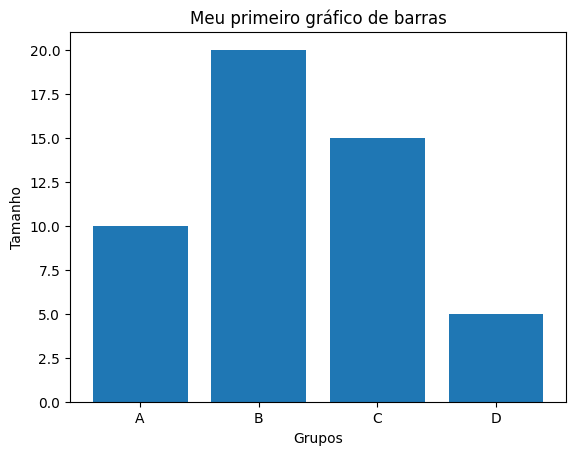

In [3]:
categorias = ['A', 'B', 'C', 'D']
valores = [10, 20, 15, 5]
plt.bar(categorias, valores)
plt.xlabel('Grupos')
plt.ylabel('Tamanho')
plt.title('Meu primeiro gráfico de barras')
plt.show()

Inicialmente, você irá utilizar o módulo pyplot da biblioteca matplotlib (referenciado em nosso código pelo pseudônimo plt). Esse módulo é uma coleção de funções que criam e alteram figuras a partir de dados de forma programática. Para criar gráficos de barras, existe o método .bar(). Esta função recebe como argumentos uma sequência de categorias e uma sequência de valores associados a estas categorias que serão mapeados no comprimento das barras. Confira, no exemplo de código a seguir, a visualização de dados fictícios, armazenados em listas e, em seguida, verifique o resultado da execução do código.

Inicie pela cor das barras, que pode ser alterada através do argumento color, para o qual é passado um código de cor. A lista dos códigos possíveis para fazer essa alteração pode ser encontrada na página da documentação oficial, neste link: https://matplotlib.org/3.1.0/gallery/color/named_colors.html. Além disso, o tamanho do gráfico pode ser alterado com a função figure() através do argumento figsize, que recebe um par de valores na forma de uma tupla de Python. Esse par de valores representa largura e altura da figura em polegadas. Confira isso no código de exemplo a seguir, depois verifique a figura que representa como ficou o gráfico após a execução do código. 

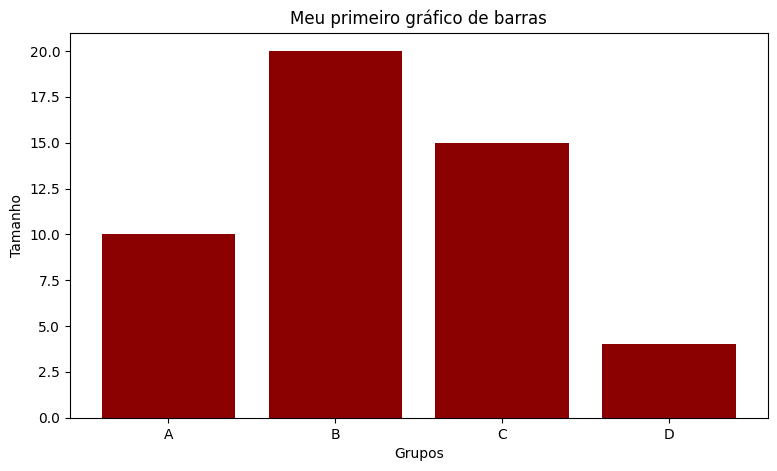

In [6]:
categorias = ['A', 'B', 'C', 'D']
valores = [10, 20, 15, 4]
plt.figure(figsize=(9,5))
plt.bar(categorias, valores, color='darkred')
plt.xlabel('Grupos')
plt.ylabel('Tamanho')
plt.title('Meu primeiro gráfico de barras')
plt.show()

Na linha 1, foi utilizada a função plt.figure(figsize=(9, 3)) para definir que a visualização terá 9 polegadas de comprimento e 3 de altura.

Na linha 2, é adicionado o argumento ‘darkred’ ao parâmetro color na função bar(), ou seja, vermelho escuro. As funções do matplotlib em geral possuem diversos parâmetros que podem ser utilizados para controlar a estética das visualizações.

Note que cada nova função chamada altera detalhes da visualização de forma incremental. Ou seja, você pode utilizar várias funções, uma após a outra, e alterar incrementalmente a estética da visualização.

Para conhecer as diversas opções de costomização que a biblioteca matplotlib oferece, você pode consultar a rica e detalhada documentação oficial, em inglês, neste link: https://matplotlib.org/contents.html.

A seguir, você irá trabalhar com um conjunto de dados reais para exercitar conceitos de visualização.

Você gosta de cinema? Para exemplificar os conceitos estudados neste conteúdo, você irá analisar um conjunto de dados de bilheterias de filmes famosos lançados entre 2007 e 2011. Os dados estão disponibilizados gratuitamente na Web e podem ser acessados pela URI: https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json.

Você conferiu os dados? Note que o formato deles é diferente das tradicionais tabelas, mas como seguem uma estrutura padronizada também são considerados dados estruturados. O nome desse tipo de formato é JavaScript Object Notation, mais conhecido como JSON, e é um formato de troca de dados compacto, de padrão aberto, muito utilizado por sistemas computacionais, principalmente na Web. Por seguir uma estrutura definida, é fácil converter JSON para uma tabela. De fato, o pandas disponibiliza um método para criar os familiares DataFrames de pandas a partir de um arquivo JSON. A seguir, confira um exemplo de código e, em seguida, verifique o resultado de sua execução. 

In [4]:
# Conjunto de dados de bilheterias de filmes famosos lançados entre 2007 e 2011.
filmes_uri = 'https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json'
filmes = pd.read_json(filmes_uri)
filmes.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


Agora, vamos analisar o código e a saída.

Na linha 1, o endereço dos dados na web é atribuído à variável filmes_uri, ou seja, o endereço é armazenado na variável. Na linha 2, chama-se o pseudônimo pd para utilizar o método de pandas read_json. O método recebe como argumento o endereço no qual os dados estão armazenados e retorna um DataFrame com os dados organizados em um formato de tabela que é armazenado na variável filmes. Como filmes é um DataFrame, podemos utilizar alguns dos métodos existentes dessa estrutura para analisar os dados. O método head() na linha 3 tem como saída as colunas e as 5 primeiras linhas da tabela. Note que o conjunto de dados possui 5 atributos, 2 quantitativos e 3 categóricos. Os quantitativos são Budget_M e Worldwide_Gross_M, que correspondem ao orçamento do filme e a bilheteria mundial que o filme obteve em milhões de dólares, respectivamente. Os atributos categóricos são Film, Genre e Year, que representam o nome do filme, o gênero e o ano em que foi lançado, respectivamente. Note que apesar de os valores de Year serem números, ele é um atributo categórico, e não quantitativo! Isso porque ele é o ano em que o filme foi lançado, logo não representa uma quantidade, e sim um grupo. Você compreende o porquê? Confira novamente o código de exemplo e o resultado de sua execução após compreender os detalhes apresentados até aqui. 

Como análise preliminar, você pode utilizar o conhecido método describe() para obter medidas estatísticas sobre os atributos quantitativos. Confira no exemplo a seguir:

In [5]:
filmes.describe()

,Year,Worldwide_Gross_M,Budget_M
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


Agora você possui algumas informações sobre os dados. Por exemplo, você sabe que nesse conjunto há dados sobre 30 filmes (count), que o valor máximo de bilheteria que um filme obteve nesse conjunto foi de 2.784 milhões de dólares (max), que o orçamento mínimo entre os filmes foi de 50 milhões de dólares (min). Também sabe sobre a média (mean) e desvio padrão (std) dessas variáveis. Observe que o pandas também realizou essas medidas para o atributo Year, pois como ele é representado por números, o pandas o interpretou como um atributo quantitativo. Note também que essas informações não dizem nada a respeito das outras categorias. Como você já deve saber, não é possível calcular a média ou desvio padrão de atributos categóricos. Porém, você pode estar interessado em questões como: quantos filmes foram feitos em cada gênero? E em cada ano? Quais gêneros obtiveram maior bilheteria no total? E quais tiveram mais orçamento? Essas perguntas podem ser respondidas através de gráficos de barras, o que você irá conferir a seguir

In [11]:
contagens = filmes.groupby(by='Genre').count()
contagens

,Film,Year,Worldwide_Gross_M,Budget_M
Genre,,,,
Action,13,13,13,13
Adventure,4,4,4,4
Animation,8,8,8,8
Drama,2,2,2,2
Fantasy,1,1,1,1
Romance,1,1,1,1
Thriller,1,1,1,1


Na variável filmes, que contém o DataFrame dos dados analisados, foi aplicado o método groupby(), recebendo como argumento o atributo ‘Genre’ e, por fim, aplicando o método count(), que conta a quantidade de elementos em cada gênero. O resultado desse método é um DataFrame, cujo index são os gêneros, e as colunas são os atributos do DataFrame original, cujo valor é o resultado da função aplicada, nesse caso, a contagem. 

Agora você já possui os dados necessários para gerar a visualização utilizando o matplotlib. Basta selecionar o index e qualquer coluna do DataFrame contagens. Confira a seguir: 

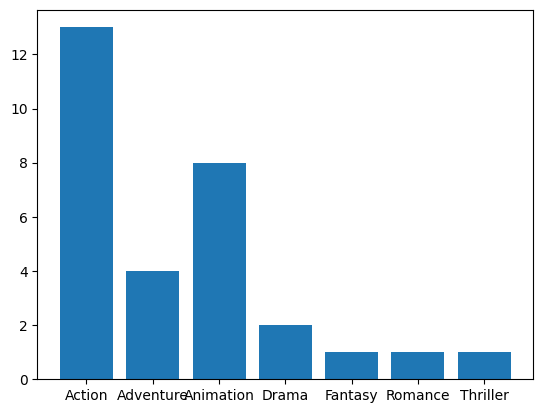

In [12]:
plt.bar(contagens.index, contagens['Worldwide_Gross_M'])
plt.show()

Muito bem! Agora você já deve saber fazer uma visualização de dados reais utilizando o matplotlib!

Note que essa visualização indica informações importantes sobre os dados. Observa-se, por exemplo, que a quantidade de filmes não está bem distribuída entre os gêneros nesses dados. Existem muito mais filmes de ação do que todos os outros gêneros. De fato, existe apenas um exemplar de filme de fantasia, romance e suspense. É necessário ter em mente que esses dados são apenas uma amostra e não representam todos os filmes feitos nesse período. Apesar de informativa, a visualização possui alguns problemas funcionais. O nome dos gêneros no eixo horizontal está se sobrepondo, dificultando a leitura e não há linhas guias do eixo horizontal, o que pode dificultar quando se quiser obter o valor exato de cada barra. Além disso, para gerar essa visualização, é necessário realizar algumas manipulações nos dados. A seguir, iremos utilizar a biblioteca seaborn para tentar solucionar esses problemas. 

## 1.2 Gráficos de Barras com seaborn

Como já mencionado, seaborn é uma biblioteca de visualização de dados, construída a partir do matplotlib, mas com algumas vantagens. Uma dessas vantagens é que enquanto o matplotlib é orientado a sequências de dados, o seaborn é orientado a conjuntos de dados com múltiplas variáveis. Ele se integra, naturalmente, com os DataFrames de pandas e possui suporte para visualizar agregações de variáveis categóricas.

O que isso significa? Significa que podemos gerar a visualização anterior a partir do DataFrame original diretamente, sem a necessidade de agrupar os dados explicitamente. Basta indicar o conjunto de dados e a coluna que se deseja visualizar. O seaborn se encarrega de agrupar e calcular os valores dos dados, utilizando apenas uma função. Outras características apreciadas no seaborn são a sua simplicidade e o design atraente das visualizações geradas.

A função para gerar gráficos de barras de contagem de elementos é countplot(). Confira o exemplo a seguir para entender como essa função é aplicada e como são apresentados os mesmos dados da visualização anterior, a contagem de filmes por gênero.

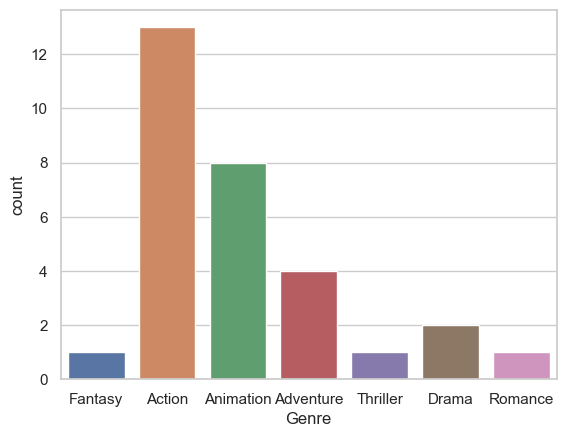

In [21]:
sns.set(style='whitegrid')
sns.countplot(x="Genre", data=filmes)
plt.show()

O que você achou do resultado? Vamos analisar cada linha deste código. Na linha 1, usamos o pseudônimo sns que atribuímos ao seaborn para chamar a função set(), recebendo como argumento ao parâmetro style o valor ‘whitegrid’. Essa função pode receber diferentes argumentos que controlam a estética das visualizações do seaborn. O parâmetro style pode receber um conjunto de códigos de estilos pré-definidos. O estilo escolhido, ‘whitegrid’, utiliza um fundo branco com linhas guias que auxiliam a comparar valores. Outros estilos possíveis são ‘darkgrid’, ‘whitegrid’, ‘dark’, ‘white’ e ‘ticks. Encorajo você a experimentar esses outros estilos, que podem ser mais ou menos adequados a depender do objetivo da visualização. Uma vez utilizada a função set(), ele configura todas as futuras visualizações criadas no código.

Na linha 2 é chamada a função countplot(), que gera a visualização em si, contando o número de elementos de um determinado grupo. Neste exemplo, ela recebe dois argumentos. Um é o parâmetro x, ou seja, o eixo horizontal, que recebe o valor ‘Genre’, que corresponde a coluna de gêneros cinematográficos dos nossos dados. Isso significa dizer que cada barra, alinhadas no eixo x, irão corresponder a um gênero. O outro parâmetro é data (do inglês, dados), que recebe a variável onde está armazenado o conjunto de dados. Como já mencionado, essa é uma diferença conceitual entre o matplotlib e o seaborn. Lembre que no matplotlib você passou como argumentos sequências de dados (Series, listas), uma sequência contendo as classes e outra contendo os valores. No seaborn, você passa o conjunto de dados (tabela, DataFrame) e indica qual coluna você deseja visualizar.

Por último é chamada a função show() do matplotlib, que exibe a visualização criada. Notou como o seaborn necessita do matplotlib? 

Uma falha desta visualização é que o nome das categorias, indicados no eixo x, ficaram tão apertados que acabaram por se sobrepor, o que dificulta a leitura. Existem algumas formas de resolver isso, uma deles é modificar o tamanho da visualização. Para fazer isso, utilizamos a o método figure() do pyplot. Você já notou que o seaborn compartilha muitas das funções do matplotlib, não é? Por isso é interessante se trabalhar com as duas. Também iremos usar a método title() do pylplot para exibir um título no gráfico. Vamos também mudar o estilo de gráfico para “darkgrid”. Confira no exemplo o resultado: 

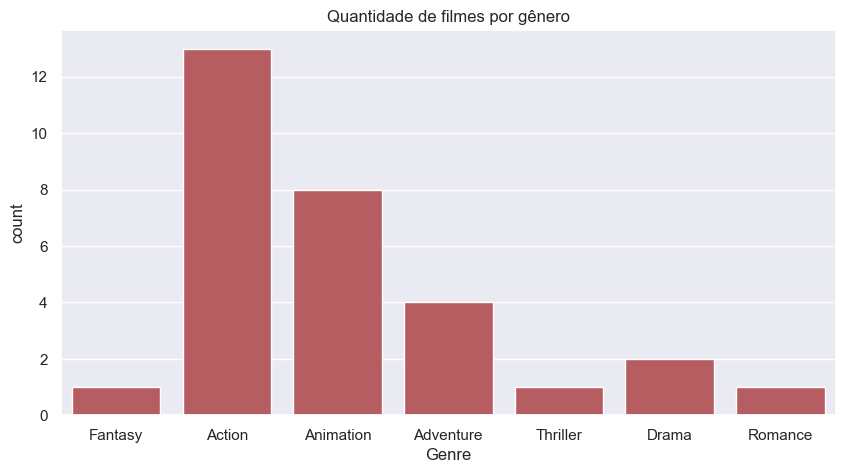

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.title('Quantidade de filmes por gênero')
sns.countplot(x='Genre', color = 'r', data=filmes)
plt.show()

Agora a visualização está bem melhor. Uma outra solução, principalmente quando existem muitas classes, é criar um gráfico de barras horizontais, agrupando as barras no eixo y e mapeando os comprimentos no eixo x. Confira como isso é feito!

Alterar o gráfico já criado para um de barras horizontais é muito simples no seaborn. Basta que o valor da categoria, nesse caso ‘Genre’, seja passado ao parâmetro y, ao invés de x. Isso significa dizer a função que as barras devem ficar alinhadas no eixo vertical. Confira no exemplo a seguir: 

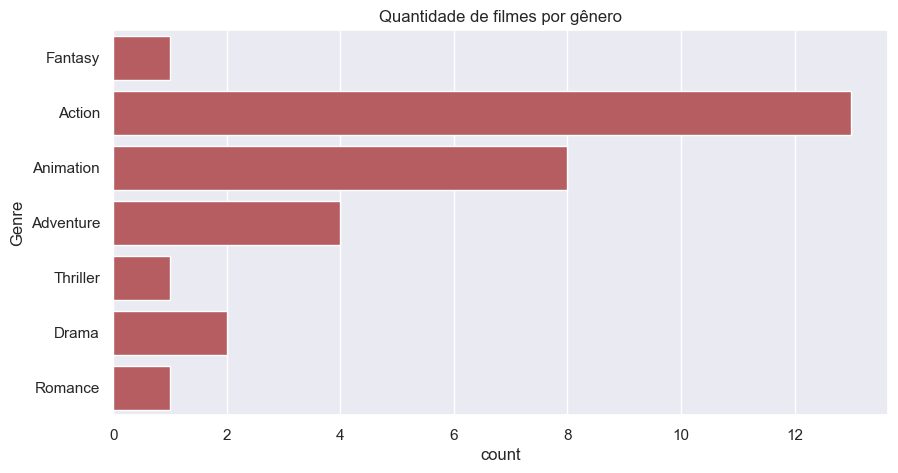

In [23]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5))
plt.title('Quantidade de filmes por gênero')
sns.countplot(y='Genre', color = 'r', data=filmes)
plt.show()

Logicamente, se você tentar atribuir, simultaneamente, valores aos parâmetros x e y, a função retornará um erro.

Com essa função você já pode explorar os dados com mais facilidade e obter uma série de informações a respeito de contagens dos filmes em grupos. Por exemplo, você pode usar essa mesma função para saber quantos filmes foram feitos em cada ano. Mas e se você estiver interessado em outros valores além de contagem? Lembre-se que cada filme, além de gênero e ano, possui um valor de orçamento e de bilheteria mundial. Pode ser útil, por exemplo, saber a média de orçamento por gênero, ou o somatório de bilheteria total. Enquanto no matplotlib seria necessário manipular o dataset para calcular esses valores e utilizá-los nas funções, o seaborn permite fazer isso diretamente através da função barplot(). Acompanhe como ela é aplicada.

O resultado da função barplot() é muito semelhante ao da countplot(). Ou seja, um gráfico de barras. A diferença é que countplot() mostra uma contagem de elementos de grupos, enquanto barplot() mostra medidas associadas a esses grupos. Por padrão, essa medida é a média aritmética. No exemplo a seguir, você visualizará a média de bilheteria por gênero. Confira o exemplo de código e o resultado de sua aplicação.

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_10404\452365613.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="Genre", y="Worldwide_Gross_M", color='b', ci='sd', data=filmes)


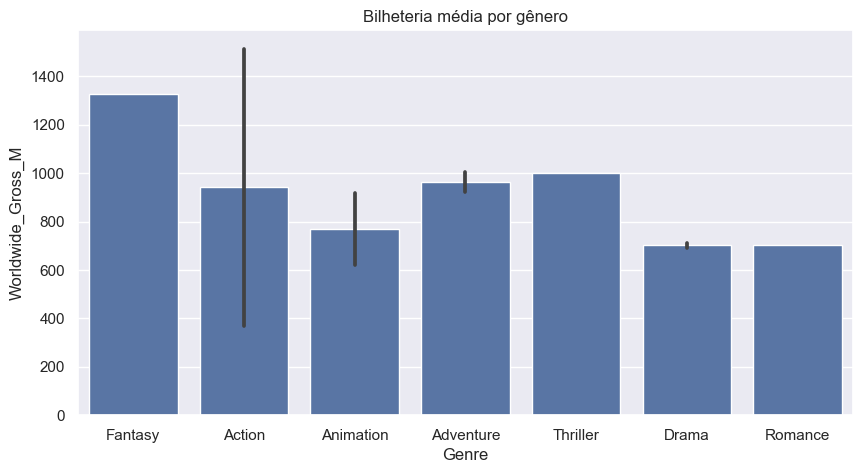

In [24]:
plt.figure(figsize=(10,5))
plt.title('Bilheteria média por gênero')
sns.barplot(x="Genre", y="Worldwide_Gross_M", color='b', ci='sd', data=filmes)
plt.show()

# a cor utilizada foi ‘b’, ou seja, blue (azul)
# Por fim, um novo parâmetro chamado ci (confidence interval) foi utilizado, recebendo o valor 'sd'
# (standard deviation, o desvio padrão). Por padrão, o parâmetro ci é usado para estimar intervalos
# de confiança, um intervalo estatístico onde provavelmente se encontra um valor desconhecido.
# Neste caso, passando o valor ‘sd’, ao invés de intervalo de confiança, é calculado o já conhecido
# desvio padrão, que indica como os dados se dispersam ao redor da média. O desvio padrão é
# representado pela linha escura no centro das barras. 

Vamos analisar os parâmetros da função barplot(), chamada na linha 3. O parâmetro x recebe a categoria que cada barra irá representar, enquanto o parâmetro y recebe o valor de bilheteria. Será então calculada a média das bilheterias por gênero, e esse valor será mapeado no eixo y. Note que a cor utilizada foi ‘b’, ou seja, blue (azul).

Por fim, um novo parâmetro chamado ci (confidence interval) foi utilizado, recebendo o valor 'sd' (standard deviation, o desvio padrão). Por padrão, o parâmetro ci é usado para estimar intervalos de confiança, um intervalo estatístico onde provavelmente se encontra um valor desconhecido. Neste caso, passando o valor ‘sd’, ao invés de intervalo de confiança, é calculado o já conhecido desvio padrão, que indica como os dados se dispersam ao redor da média. O desvio padrão é representado pela linha escura no centro das barras.

Essa visualização diz algo interessante! Apesar de mais filmes de ação terem sido feitos nesses anos, os filmes de fantasia tiveram, em média, maior bilheteria. Além disso, os filmes de ação tiveram grande variação de bilheteria. Por que você acha que isso ocorreu? Vamos conferir?

E se, ao invés de querer saber a média, você precise do somatório dos valores associados a cada categoria? Basta alterar o parâmetro estimator, que deve receber a função que se deseja calcular. Nesse caso, a função sum, que soma todos os valores. Confira o exemplo de código e o resultado de sua execução:

C:\Users\Fabiano\AppData\Local\Temp\ipykernel_19668\2560214070.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Genre', y='Worldwide_Gross_M', color='orange', estimator = sum, ci=None, data=filmes)


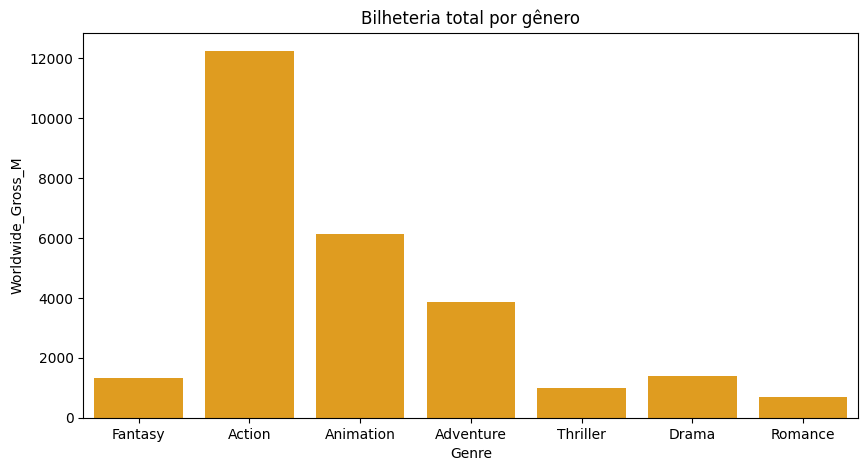

In [3]:
plt.figure(figsize=(10,5))
plt.title('Bilheteria total por gênero')
sns.barplot(x='Genre', y='Worldwide_Gross_M', color='orange', estimator = sum, ci=None, data=filmes)
plt.show()

Note que houveram duas diferenças significativas nos parâmetros da função: a passagem do argumento sum para o parâmetro estimator e a passagem do argumento None (vazio) para o parâmetro ci, para que não sejam exibidos intervalos de confiança.

Dessa vez, o resultado ficou mais similar à contagem. Mas é preciso ter atenção para não tomar conclusões precipitadas. Esse gráfico pode dar a entender que os filmes de ação têm maior bilheteria, mas isso acontece porque existem mais filmes de ação nesse conjunto de dados. Relembre que, na média, os filmes de fantasia obtiveram maior bilheteria.

Até o momento você aprendeu a gerar gráficos de barras que representam um valor para uma categoria. Porém, gráficos de barra são muito flexíveis e existem formas de representar mais de uma categoria com barras agrupadas. Você poderá entender como criá-las no próximo tópico.

# Tópico 2 – Gráficos de Barras Agrupadas
OBJETIVOS

    Aprender a criar gráficos de barras agrupadas para comparar diferentes valores em categorias;
    Entender como se utiliza paletas de cores da biblioteca seaborn para configurar o design de gráficos de barras.

Muitas vezes queremos não apenas conhecer valores quantitativos associados a uma categoria, mas comparar valores entre categorias distintas ou comparar diferentes valores dentro da mesma categoria. Tome o conjunto de dados de filmes que estivemos explorando como exemplo. Quantos filmes foram feitos de cada categoria em cada ano? Qual foi a média de orçamento por gênero em cada ano? Essas informações podem ser visualizadas com gráficos de barras agrupadas. Assim, neste tópico, você aprenderá a criar esses gráficos utilizando seaborn e também entenderá como deve utilizar as paletas de cores do seaborn para controlar as cores das visualizações quando a cor for um fator importante.

Em gráficos de barras simples, cada posição ao longo de um eixo representa uma categoria e uma barra é desenhada mapeando um valor para essa categoria. Em gráficos de barras agrupadas, as categorias também estão dispostas ao longo de um eixo, mas existe mais de uma barra para cada categoria. Essas barras em cada categoria podem ser distinguidas pela cor e representam outro atributo categórico.

Para gerar esse tipo de gráfico no seaborn, é muito simples. Basta atribuir uma categoria ao parâmetro hue nas funções que você já utilizou. Hue significa matiz de uma cor. Ou seja, a nova categoria será mapeada na cor das barras. Confira o exemplo de código a seguir e o resultado de sua execução. 

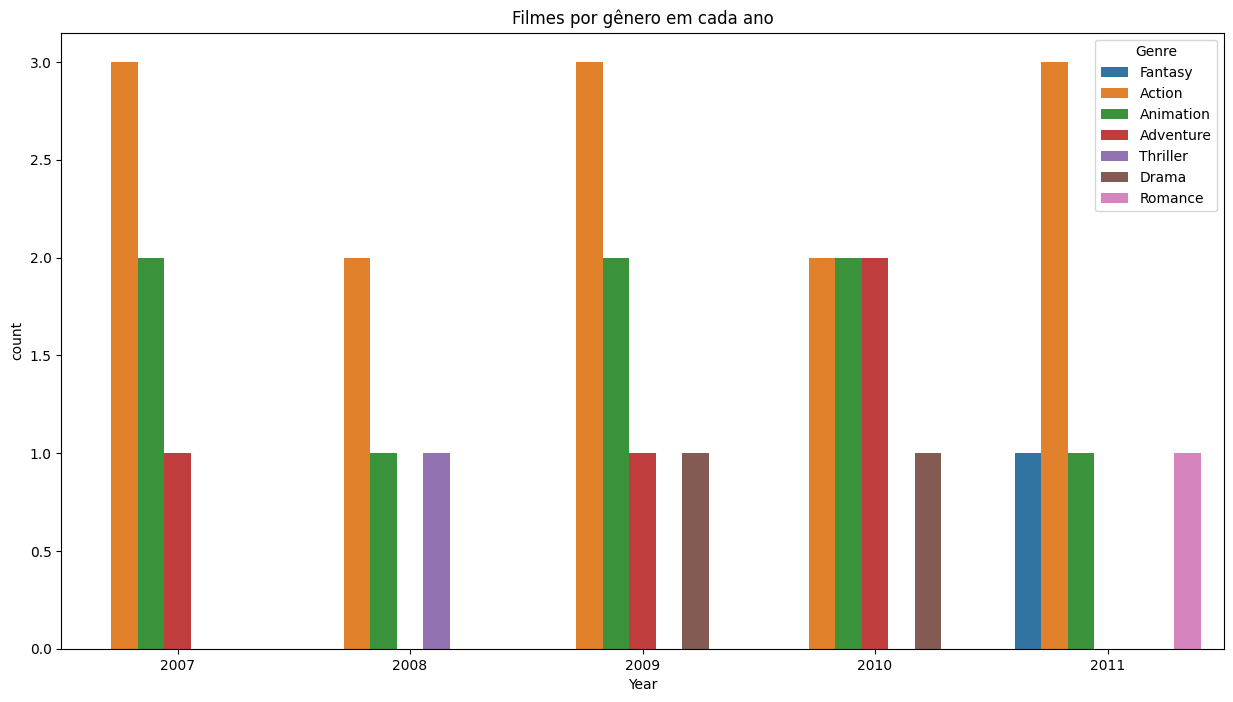

In [6]:
plt.figure(figsize=(15,8))
plt.title('Filmes por gênero em cada ano')
sns.countplot(x="Year", hue='Genre', data=filmes)
plt.show()

E então, você achou simples? As linhas 1 e 2 configuram o tamanho e o título da figura, como já feito anteriormente. Na linha 3 é chamada a função countplot() de maneira muito similar ao que já foi feito, passando o valor ‘Year’ para o parâmetro x. Ou seja, os anos serão mapeados na posição do eixo x. A novidade é o parâmetro hue, que recebe a coluna ‘Genre’, significando que o gênero dos filmes será mapeado nas cores das barras.

Note algumas particularidades dos dados: só existe um filme de fantasia e um de romance nesses dados, e são de 2011. O filme de suspense é de 2008. A quantidade de filmes de ação varia de dois a três a cada ano. E se você quiser visualizar a média de bilheteria por gênero em cada ano?

O parâmetro hue também pode ser utilizado na função barplot(). Então para criar essa visualização é análogo ao que foi feito com a função countplot(). Confira no exemplo: 

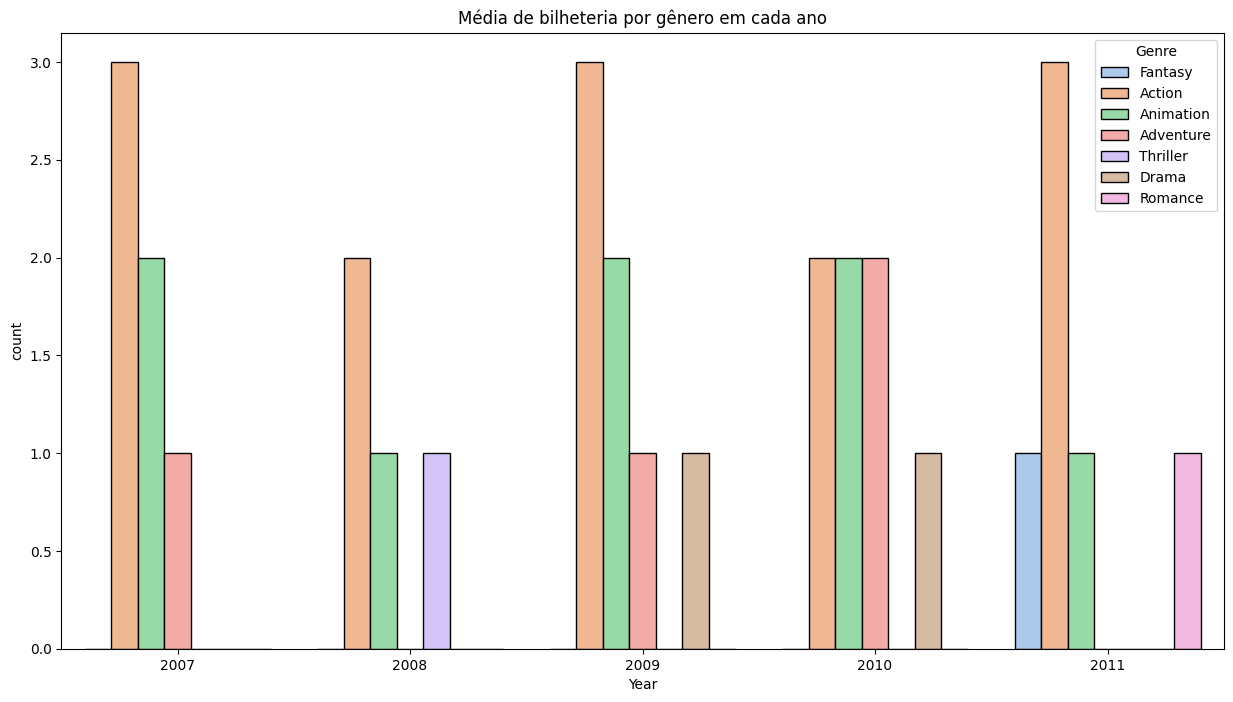

In [5]:
plt.figure(figsize=(15,8))
plt.title('Média de bilheteria por gênero em cada ano')
sns.countplot(x='Year', hue='Genre', palette='pastel', edgecolor='0', data=filmes)
plt.savefig('Média de bilheteria por gênero em cada ano.png')

A mudança nesse código em relação ao anterior ocorre somente na linha 3. Note que, na linha 3, a função barplot() é chamada passando como parâmetro x o ‘Year’ e o parâmetro y como o ‘Worldwide_Gross_M’, de forma similar ao já feito anteriormente. A grande diferença é que é passado o atributo ‘Genre’ para o parâmetro hue.

Essa visualização esclarece mais o comportamento das bilheterias. Lembre que no geral a bilheteria de filmes de fantasia era maior do que os de ação. Mas isso ocorreu porque só existe um filme de fantasia, que obteve uma boa bilheteria. Já os filmes de ação, que são maioria nesse conjunto de dados, tiveram um desempenho variável ao longo dos anos, mas tiveram em média uma grande bilheteria no ano de 2009. Que outras considerações você pode fazer a partir dessa visualização?

Note que quando você utilizou a barras simples, a cor era apenas uma opção estética. Em barras agrupadas, a cor possui valor informativo, pois é usada para distinguir categorias. É preciso escolher cuidadosamente as cores utilizadas, para que a informação seja passada de forma harmoniosa. Alterar o conjunto de cores utilizado, ou paleta de cores, é simples no seaborn, bastando alterar o valor do parâmetro palette. O seaborn disponibiliza diversas paletas de cores, que podem ser usadas tanto para distinguir como para ressaltar características de interesse. Confira no exemplo a seguir como alterar a paleta de cores da visualização: 

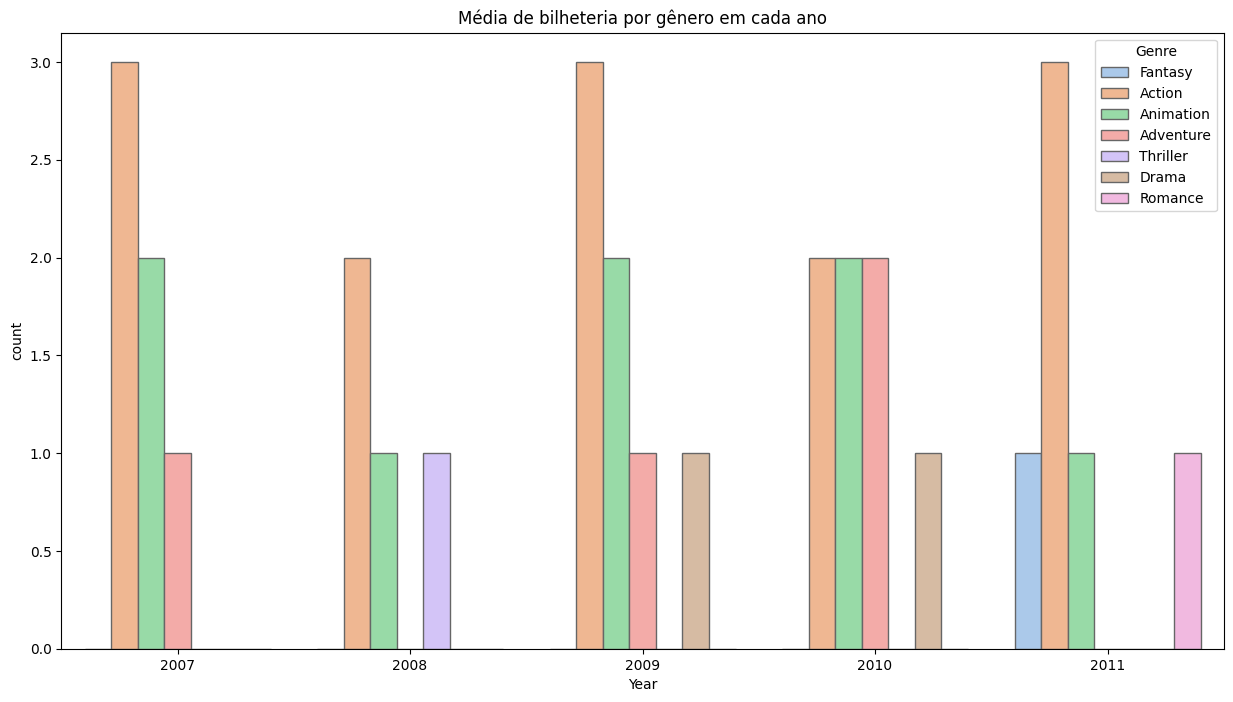

In [7]:
plt.figure(figsize=(15,8))
plt.title('Média de bilheteria por gênero em cada ano')
sns.countplot(x="Year", hue= 'Genre', palette = "pastel", edgecolor="0.4", data=filmes)
plt.show()

Na linha 2, foi passado o valor ‘pastel’ para o parâmetro palette, resultando em tons pastéis. Você pode conhecer as diversas opções de paleta consultando este link: https://seaborn.pydata.org/tutorial/color_palettes.html. Experimente utilizar outras paletas.

Também foi passado o valor 0.4 para o atributo edgecolor, que configura a cor do contorno das barras. Quanto mais próximo de 0, mais preto fica e quanto mais próximo de 1, mais branco. Teste alterar esse valor.
Você notou que existem muitas formas de alterar o design das visualizações criadas com o seaborn? Conhecer todas as opções possíveis não seria possível em uma única aula, mas você pode explorar essa grande variedade consultando a documentação oficial da biblioteca, disponível neste link: https://seaborn.pydata.org/api.html. 

Por último, você pode desejar salvar os gráficos criados. No Jupyter Notebook você pode simplesmente clicar com o botão direito do mouse, ou usar o botão Aplicação, e escolher a opção “Salvar imagem como…”, assim como você pode salvar qualquer imagem na Web. Porém, você também pode salvar a imagem através do código, automatizando o processo. Basta utilizar a função do matplotlib savefig(). Essa função pode receber vários argumentos para configurar o arquivo criado, como extensão, resolução da imagem e outros. Confira, no exemplo de código a seguir, como salvar a última imagem criada em um arquivo com extensão PNG. O código exibe a imagem no programa e, ao mesmo tempo, salva a imagem na mesma pasta do notebook. 

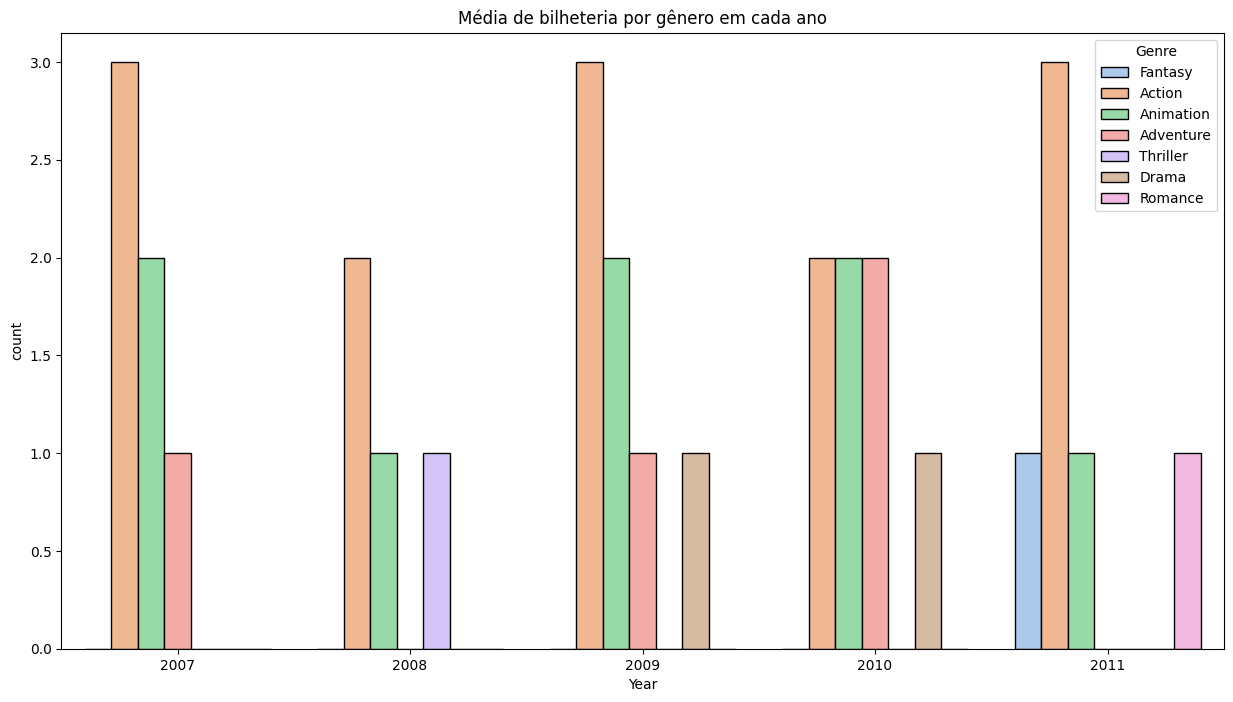

In [8]:
plt.figure(figsize=(15,8))
plt.title('Média de bilheteria por gênero em cada ano')
sns.countplot(x="Year", hue= 'Genre', palette = "pastel", edgecolor="0", data=filmes)
plt.savefig('Média de bilheteria por gênero em cada ano.png')

Note que o único argumento passado foi o nome do arquivo. O arquivo é salvo diretamente na pasta onde está o Jupyter Notebook. Se você desejar, pode especificar no parâmetro da função o caminho completo para salvar o arquivo em qualquer pasta da sua máquina.



Caro aluno, você chegou ao final da aula sobre visualizar quantidades categóricas. Você agora está apto a utilizar comandos básicos das bibliotecas matplotlib e seaborn para criar diferentes gráficos de barras sobre diferentes tipos de dados e modificar a aparência desses gráficos para criar melhores visualizações. Existem muitas opções gráficas não estudadas aqui e recomendo que você explore a documentação das bibliotecas para tirar o melhor proveito delas. Além disso, é importante lembrar que as visualizações devem revelar informações sobre os dados, e às vezes é necessária alguma manipulação nesses dados. Por isso, também é importante conhecer as opções existentes na biblioteca pandas para trabalhar com dados e ampliar as suas possibilidades de análise.

Por fim, gráficos de barras são visualizações básicas e muito utilizadas para representar quantidades de dados categóricos, mas existem outros tipos que podem ser úteis em casos específicos, como gráficos de pontos e mapas de calor. Percebeu como são muitas as possibilidades de visualização de dados? Aconselho você a sempre estudar outras possibilidades e experimentá-las em diferentes casos.

Espero que você tenha aprendido e experimentado bastante com este conteúdo. Até a próxima!

Referências

    WILKE, Claus O. Fundamentals of Data Visualization. O’Reilly, 2019.
    Matplotlib. https://matplotlib.org/index.html. Acessado pela última vez em Maio de 2020.
    Seaborn. https://seaborn.pydata.org/tutorial.html. Acessado pela última vez em Maio de 2020.
